<a href="https://colab.research.google.com/github/Varshithadavarapalli/hospital-charges-analysis/blob/main/hospital-charges-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# ✅ Load the datasets
file_path1 = "/inpatientCharges.csv"
file_path2 = "/Hospital General Information.csv"

df_charges = pd.read_csv(file_path1, encoding="ISO-8859-1")
df_hospital_info = pd.read_csv(file_path2, encoding="ISO-8859-1")

# ✅ Standardize column names for merging
df_charges.rename(columns={'Provider Id': 'Provider ID'}, inplace=True)

# ✅ Perform an INNER JOIN on 'Provider ID' (keeping only matching hospitals)
df_merged = pd.merge(df_charges, df_hospital_info, on="Provider ID", how="outer")

# ✅ Display the first few rows of the merged dataset
print(df_merged.head())

# ✅ Save the merged dataset to a new CSV file
df_merged.to_csv("merged_hospital_data.csv", index=False)


                                      DRG Definition  Provider ID  \
0           039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10001   
1  057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...        10001   
2  064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...        10001   
3  065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...        10001   
4  066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...        10001   

                      Provider Name Provider Street Address Provider City  \
0  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE        DOTHAN   
1  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE        DOTHAN   
2  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE        DOTHAN   
3  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE        DOTHAN   
4  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE        DOTHAN   

  Provider State  Provider Zip Code Hospital Referral Region Description  \
0             AL            36301.0           

In [4]:
# ✅ Step 4: Check for Missing Values After Merging

# Count missing values in each column
missing_values = df_merged.isnull().sum()

# Display only columns with missing values
missing_values[missing_values > 0]


,0
DRG Definition,1703
Provider Name,1703
Provider Street Address,1703
Provider City,1703
Provider State,1703
Provider Zip Code,1703
Hospital Referral Region Description,1703
Total Discharges,1703
Average Covered Charges,1703
Average Total Payments,1703


In [6]:
print(df_merged.columns)


Index(['DRG Definition', 'Provider ID', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments',
       'Hospital Name', 'Address', 'City', 'State', 'ZIP Code', 'County Name',
       'Phone Number', 'Hospital Type', 'Hospital Ownership',
       'Emergency Services', 'Meets criteria for meaningful use of EHRs',
       'Hospital overall rating', 'Mortality national comparison',
       'Safety of care national comparison', 'Readmission national comparison',
       'Patient experience national comparison',
       'Effectiveness of care national comparison',
       'Timeliness of care national comparison',
       'Efficient use of medical imaging national comparison'],
      dtype='object')


In [8]:
df_merged.columns = df_merged.columns.str.strip()


In [9]:
print(df_merged.columns)  # Ensure spaces are removed
print(df_merged["Total Discharges"].head())  # Should work now


Index(['DRG Definition', 'Provider ID', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       'Total Discharges', 'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments', 'Hospital Name', 'Address', 'City',
       'State', 'ZIP Code', 'County Name', 'Phone Number', 'Hospital Type',
       'Hospital Ownership', 'Emergency Services',
       'Meets criteria for meaningful use of EHRs', 'Hospital overall rating',
       'Mortality national comparison', 'Safety of care national comparison',
       'Readmission national comparison',
       'Patient experience national comparison',
       'Effectiveness of care national comparison',
       'Timeliness of care national comparison',
       'Efficient use of medical imaging national comparison'],
      dtype='object')
0     91.0
1     38.0
2     84.0
3    169.0
4     33.0
Name: Total Discharges, dtype: float6

In [11]:
# ✅ Remove dollar signs ($) and convert to numeric values
financial_columns = ["Total Discharges", "Average Covered Charges",
                     "Average Total Payments", "Average Medicare Payments"]

# Strip spaces from column names to ensure proper access
df_merged.columns = df_merged.columns.str.strip()

# Convert financial columns to numeric
for col in financial_columns:
    df_merged[col] = df_merged[col].astype(str)  # Convert to string (safe step)
    df_merged[col] = df_merged[col].str.replace("[$,]", "", regex=True)  # Remove $ and ,
    df_merged[col] = pd.to_numeric(df_merged[col], errors="coerce")  # Convert to numbers


In [13]:
# ✅ Fill missing financial data with median values
for col in financial_columns:
    df_merged[col] = df_merged[col].fillna(df_merged[col].median())


In [15]:
#✅ Drop unnecessary footnote columns
footnote_columns = [col for col in df_merged.columns if "footnote" in col.lower()]
df_merged.drop(columns=footnote_columns, inplace=True)

# ✅ Fill missing hospital details with "Unknown"
hospital_details = ["Hospital Name", "Address", "City", "State", "ZIP Code", "County Name",
                    "Phone Number", "Hospital Type", "Hospital Ownership", "Emergency Services"]
df_merged[hospital_details] = df_merged[hospital_details].fillna("Unknown")

# ✅ Fill missing financial data with median values
financial_columns = ["Total Discharges", "Average Covered Charges",
                     "Average Total Payments", "Average Medicare Payments"]

for col in financial_columns:
    df_merged[col] = df_merged[col].fillna(df_merged[col].median())

# ✅ Fill missing quality metrics with "Not Available"
quality_columns = ["Mortality national comparison", "Safety of care national comparison",
                   "Readmission national comparison", "Patient experience national comparison",
                   "Effectiveness of care national comparison", "Timeliness of care national comparison",
                   "Efficient use of medical imaging national comparison"]
df_merged[quality_columns] = df_merged[quality_columns].fillna("Not Available")

# ✅ Check again for missing values
print(df_merged.isnull().sum().sum())  # Should return 0 if all missing values are handled

22252


In [16]:
df_merged[quality_columns] = df_merged[quality_columns].astype(str)


In [17]:
for col in financial_columns:
    df_merged[col] = pd.to_numeric(df_merged[col], errors="coerce")


In [18]:
print("Total Missing Values After Cleaning:", df_merged.isnull().sum().sum())


Total Missing Values After Cleaning: 22252


In [19]:
# ✅ 1. Drop unnecessary footnote columns (if not already done)
footnote_columns = [col for col in df_merged.columns if "footnote" in col.lower()]
df_merged.drop(columns=footnote_columns, inplace=True)

# ✅ 2. Fill missing hospital details with "Unknown"
hospital_details = ["Hospital Name", "Address", "City", "State", "ZIP Code", "County Name",
                    "Phone Number", "Hospital Type", "Hospital Ownership", "Emergency Services"]

df_merged[hospital_details] = df_merged[hospital_details].fillna("Unknown")

# ✅ 3. Convert financial columns to numeric & Fill missing financial data with median values
financial_columns = ["Total Discharges", "Average Covered Charges",
                     "Average Total Payments", "Average Medicare Payments"]

for col in financial_columns:
    df_merged[col] = df_merged[col].astype(str).str.replace("[$,]", "", regex=True)  # Remove $ and ,
    df_merged[col] = pd.to_numeric(df_merged[col], errors="coerce")  # Convert to numbers
    df_merged[col] = df_merged[col].fillna(df_merged[col].median())  # Fill missing values

# ✅ 4. Fill missing quality metrics with "Not Available"
quality_columns = ["Mortality national comparison", "Safety of care national comparison",
                   "Readmission national comparison", "Patient experience national comparison",
                   "Effectiveness of care national comparison", "Timeliness of care national comparison",
                   "Efficient use of medical imaging national comparison"]

df_merged[quality_columns] = df_merged[quality_columns].fillna("Not Available")

# ✅ 5. Check if missing values are now 0
total_missing_values = df_merged.isnull().sum().sum()
print("✅ Final Missing Values After Fix:", total_missing_values)  # Should be 0


✅ Final Missing Values After Fix: 22252


In [20]:
# Identify columns with missing values
missing_summary = df_merged.isnull().sum()
missing_columns = missing_summary[missing_summary > 0]
print("Columns with Missing Values:\n", missing_columns)


Columns with Missing Values:
 DRG Definition                               1703
Provider Name                                1703
Provider Street Address                      1703
Provider City                                1703
Provider State                               1703
Provider Zip Code                            1703
Hospital Referral Region Description         1703
Meets criteria for meaningful use of EHRs    5335
Hospital overall rating                      4996
dtype: int64


In [21]:
location_columns = ["DRG Definition", "Provider Name", "Provider Street Address",
                    "Provider City", "Provider State", "Provider Zip Code",
                    "Hospital Referral Region Description"]

df_merged[location_columns] = df_merged[location_columns].fillna("Unknown")


In [22]:
df_merged["Meets criteria for meaningful use of EHRs"] = df_merged["Meets criteria for meaningful use of EHRs"].fillna("No Data")


In [23]:
df_merged["Hospital overall rating"] = df_merged["Hospital overall rating"].fillna("Not Rated")


In [24]:
print("Final Missing Values Count:", df_merged.isnull().sum().sum())  # Should return 0


Final Missing Values Count: 0


In [25]:
df_merged.to_csv("cleaned_hospital_data.csv", index=False)


In [28]:
import pandas as pd

# Load the cleaned dataset (update the file path if needed)
file_path = "cleaned_hospital_data.csv"
df_cleaned = pd.read_csv(file_path, encoding="ISO-8859-1")

# Verify the first few rows
print(df_cleaned.head())

# Check for any remaining missing values
print("Total Missing Values:", df_cleaned.isnull().sum().sum())  # Should return 0


                                      DRG Definition  Provider ID  \
0           039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10001   
1  057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...        10001   
2  064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...        10001   
3  065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...        10001   
4  066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...        10001   

                      Provider Name Provider Street Address Provider City  \
0  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE        DOTHAN   
1  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE        DOTHAN   
2  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE        DOTHAN   
3  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE        DOTHAN   
4  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE        DOTHAN   

  Provider State Provider Zip Code Hospital Referral Region Description  \
0             AL           36301.0             

Summary Statistics:
          Provider ID  Total Discharges  Average Covered Charges  Average Total Payments  Average Medicare Payments
count  164768.000000     164768.000000            164768.000000           164768.000000              164768.000000
mean   255860.214611         42.613244             36021.417248             9681.702929                8470.346344
std    151613.706029         50.864288             34901.057969             7629.098490                7275.431729
min     10001.000000         11.000000              2459.400000             2673.000000                1148.900000
25%    110107.000000         17.000000             16028.545000             5254.907500                4212.090000
50%    250010.000000         27.000000             25245.820000             7214.100000                6158.460000
75%    380090.000000         49.000000             42953.285000            11227.752500               10003.255000
max    670118.000000       3383.000000            929118.90

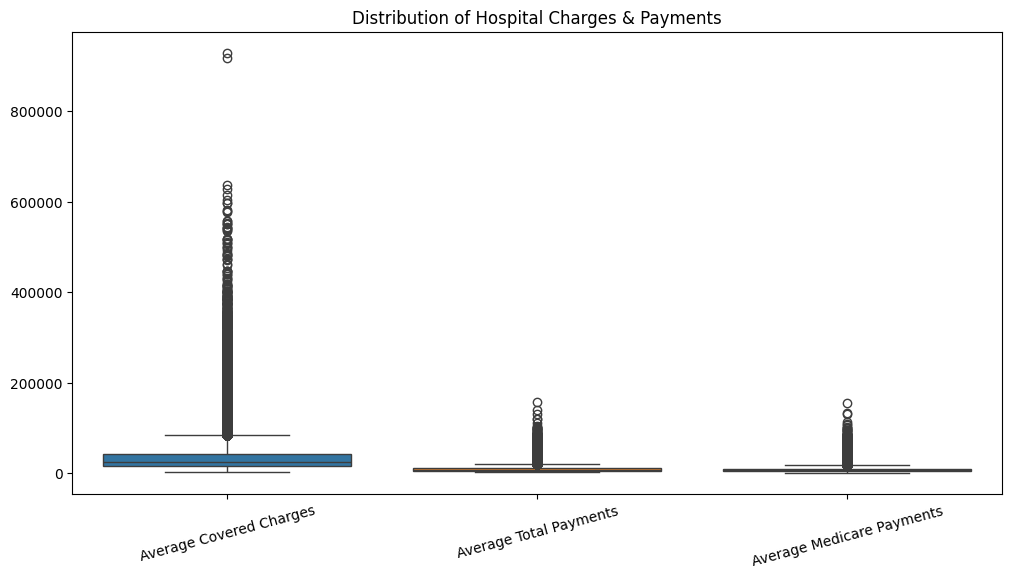


🔹 Top 10 Highest Charging Hospitals:
                                    Provider Name  Average Covered Charges  Average Total Payments
17895                          STANFORD HOSPITAL                929118.90               156158.18
13626                        WASHINGTON HOSPITAL                918023.18               119113.00
17959                          STANFORD HOSPITAL                637377.71               109945.57
17011                    NORTHBAY MEDICAL CENTER                628730.40                84617.90
124447                TEMPLE UNIVERSITY HOSPITAL                613926.60                80549.67
97053        MEADOWLANDS HOSPITAL MEDICAL CENTER                602981.37                55592.97
20428                CEDARS-SINAI MEDICAL CENTER                596878.02                90466.26
129464             CROZER CHESTER MEDICAL CENTER                596410.26                49760.60
129395             CROZER CHESTER MEDICAL CENTER                581801.92      

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ✅ Summary Statistics of Financial & Performance Metrics
summary_stats = df_cleaned.describe()
print("Summary Statistics:\n", summary_stats.to_string())

# ✅ Identify Outliers in Hospital Charges & Payments
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[["Average Covered Charges", "Average Total Payments", "Average Medicare Payments"]])
plt.title("Distribution of Hospital Charges & Payments")
plt.xticks(rotation=15)
plt.show()

# ✅ Find Top & Bottom Hospitals by Cost & Performance
# Top 10 Hospitals by Highest Charges
top_charging_hospitals = df_cleaned.nlargest(10, "Average Covered Charges")[["Provider Name", "Average Covered Charges", "Average Total Payments"]]

# Bottom 10 Hospitals by Lowest Charges
bottom_charging_hospitals = df_cleaned.nsmallest(10, "Average Covered Charges")[["Provider Name", "Average Covered Charges", "Average Total Payments"]]

# ✅ Display Results in Text Form
print("\n🔹 Top 10 Highest Charging Hospitals:\n", top_charging_hospitals.to_string())
print("\n🔹 Top 10 Lowest Charging Hospitals:\n", bottom_charging_hospitals.to_string())
